In [3]:
import pandas as pd
import torch, torchvision
import json

In [6]:
import zipfile
import os

zip_path = 'data/flower_data.zip'
extract_to = 'data/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [7]:
DATASET_PATH = 'data/images'

with open('data/cat_to_name.json', 'r') as f:
    CATEGORY_NAMES = json.load(f)

In [68]:
# Dataset does not implement (in standard definition) batching, shuffling, multiprocessing etc. All these are easier with DataLoaders

class OxfordFlowers(torch.utils.data.Dataset):
    def __init__(self, data_path, split='train', transform=None):
        self.__data_path = data_path
        self.__split = split
        self.img_and_labels = self.__create_labels()    # (image, label) list of tuples
        self.transform = transform

    # Create a list of tuples (image, label) from file
    def __create_labels(self):
        split_folder = os.path.join(self.__data_path, self.__split)   # 'data/images/train' etc.
        labels = sorted(os.listdir(split_folder))
        label_to_idx = {name: idx for idx, name in enumerate(labels)}   # {"1":0, "2":1...}

        img_and_labels = []
        for label in labels:
            label_folder = os.path.join(split_folder, label)
            for file in os.listdir(label_folder):
                if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    filename = os.path.join(label_folder, file)
                    img_and_labels.append((filename,label_to_idx[label]))
        return img_and_labels

    def __len__(self):
        return len(self.img_and_labels)

    def __getitem__(self, idx):
        filename, label = self.img_and_labels[idx]
        image = torchvision.io.read_image(filename).float()/255.0   # Convert from PyTorch int [0,255] to float [0,1] because Normalize() expects this
        if self.transform:
            image = self.transform(image)
        return image, label


In [69]:
transforms = torchvision.transforms.Compose([
        torchvision.transforms.Resize((224,224)),
        torchvision.transforms.Normalize(mean=0.5, std=0.5)
    ])

training_data = OxfordFlowers(DATASET_PATH, split='train', transform=transforms)
valid_data = OxfordFlowers(DATASET_PATH, split='valid', transform=transforms)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9755855..0.7951219].


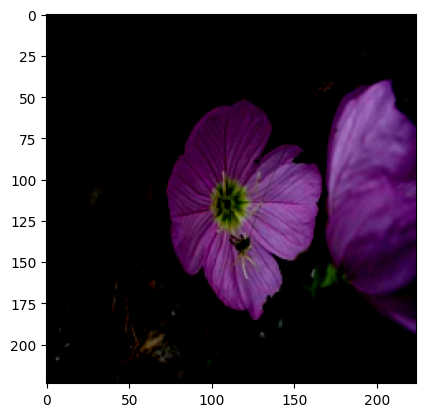

In [70]:
import matplotlib.pyplot as plt
plt.imshow(training_data[0][0].permute(1, 2, 0).numpy())

In [71]:
train_loader = torch.utils.data.DataLoader(training_data, batch_size=64, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=True)

In [72]:
train_features, train_labels = next(iter(train_loader))
train_features, train_labels

(tensor([[[[-8.1715e-01, -7.9685e-01, -6.0909e-01,  ..., -7.1495e-01,
            -7.1915e-01, -7.2079e-01],
           [-8.0359e-01, -7.8694e-01, -6.2760e-01,  ..., -7.4167e-01,
            -7.3290e-01, -7.3054e-01],
           [-8.0429e-01, -7.9873e-01, -8.0601e-01,  ..., -7.7602e-01,
            -7.5040e-01, -7.4240e-01],
           ...,
           [ 9.8399e-02,  1.0546e-01,  1.1230e-01,  ..., -4.5060e-01,
            -4.5225e-01, -4.6353e-01],
           [ 1.4978e-01,  1.4132e-01,  1.2347e-01,  ..., -4.6710e-01,
            -4.4491e-01, -4.4610e-01],
           [ 1.1610e-01,  1.0788e-01,  9.1260e-02,  ..., -4.6055e-01,
            -4.3032e-01, -4.2366e-01]],
 
          [[-7.5733e-01, -7.4374e-01, -5.1504e-01,  ..., -7.1495e-01,
            -7.1915e-01, -7.1881e-01],
           [-7.5673e-01, -7.4721e-01, -5.5437e-01,  ..., -7.4167e-01,
            -7.3290e-01, -7.2857e-01],
           [-7.6762e-01, -7.6866e-01, -7.5600e-01,  ..., -7.7602e-01,
            -7.5040e-01, -7.4042e-01],


In [75]:
train_features.shape, train_labels.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [76]:
img = train_features[0].squeeze()   # Removes all dimensions with size 1
img.shape

torch.Size([3, 224, 224])

In [89]:
a = [3,4,5]
a.extend([])
a

[3, 4, 5]

In [8]:
from oxford import preprocessing
training_dataloader = preprocessing.create_dataloader('train', batch_size=64, shuffle=True)

In [9]:
train_features, train_labels = next(iter(training_dataloader))
train_features, train_labels

(tensor([[[[-0.5033, -0.4646, -0.4395,  ..., -0.7681, -0.7398, -0.7238],
           [-0.4946, -0.4834, -0.4951,  ..., -0.7801, -0.7415, -0.7329],
           [-0.6033, -0.6061, -0.6345,  ..., -0.7940, -0.7642, -0.7487],
           ...,
           [-0.8219, -0.8330, -0.8334,  ..., -0.6061, -0.5996, -0.6008],
           [-0.8432, -0.8339, -0.8204,  ..., -0.5941, -0.6050, -0.6083],
           [-0.8382, -0.8207, -0.8160,  ..., -0.5822, -0.6076, -0.6152]],
 
          [[-0.3778, -0.3392, -0.3144,  ..., -0.8028, -0.8169, -0.8210],
           [-0.3727, -0.3616, -0.3753,  ..., -0.8144, -0.8065, -0.8124],
           [-0.4898, -0.4936, -0.5224,  ..., -0.8273, -0.8161, -0.8071],
           ...,
           [-0.8009, -0.7899, -0.7553,  ..., -0.4893, -0.4773, -0.4767],
           [-0.8150, -0.7778, -0.7280,  ..., -0.4762, -0.4813, -0.4828],
           [-0.8100, -0.7647, -0.7236,  ..., -0.4643, -0.4839, -0.4897]],
 
          [[-0.7563, -0.7175, -0.6832,  ..., -0.8149, -0.8528, -0.8681],
           [-

In [10]:
train_features.shape

torch.Size([64, 3, 224, 224])

## Building the Model

In [12]:
device = torch.accelerator.current_accelerator().type
device

'mps'

In [55]:
class BaseLine(torch.nn.Module):
    def __init__(self, n_layers = 2 ,activation = torch.nn.ReLU()):
        super().__init__()
        self.flatten = torch.nn.Flatten()
        self.activation = activation
        self.n_layers = n_layers
        self.linear_relu_stack = torch.nn.Sequential(
            torch.nn.Linear(3*224*224, 512),
            self.activation,
            *[torch.nn.Linear(512, 512), self.activation]*self.n_layers,
            torch.nn.Linear(512,100)
        )
        print(self.linear_relu_stack)

    def forward(self, x):
        x = self.flatten(x)     # Flattens the second dimension (dim=1), leaves dim=0 intact
        logits = self.linear_relu_stack(x)  # Returns unnormalized [-infty, infty] outputs of the final layer
        return logits

In [56]:
batch_1 = next(iter(training_dataloader))
image_1, label_1 = batch_1[0][0], batch_1[1][0].item()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9994887..1.0000002].


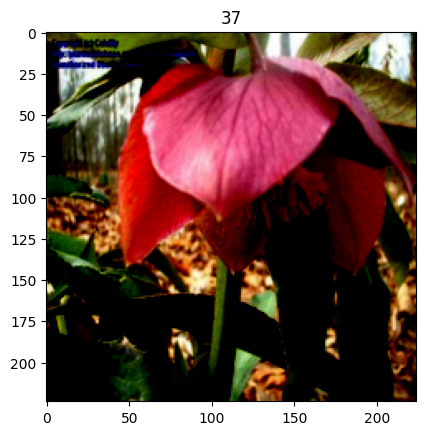

In [57]:
import matplotlib.pyplot as plt
plt.imshow(image_1.permute(1,2,0))
plt.title(label_1)
plt.show()

In [58]:
model = BaseLine(3)
logits = model(image_1)

Sequential(
  (0): Linear(in_features=150528, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=512, bias=True)
  (5): ReLU()
  (6): Linear(in_features=512, out_features=512, bias=True)
  (7): ReLU()
  (8): Linear(in_features=512, out_features=100, bias=True)
)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x50176 and 150528x512)

In [35]:
print(*[4,5,6]*2)

4 5 6 4 5 6
